# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('flights.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution will be provided.

In [140]:
# Sai Kumar Code
#1a)
df.isnull().sum()

#We see null values in DepDel15,
a=df.groupby('DepDel15').count()
#filling null values with zero
a.fillna(0.0)
a.isnull().sum() # no null vlaues 

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
Route                0
dtype: int64

In [86]:
#1b)
df['DepDel15'].unique()
#df.isnull().sum()


array([ 0.,  1., nan])

In [100]:
#2a)
d=['ArrDelay','DepDelay']
#Arrdelay & DepDelay mean
df[d].mean()
#ArrDelay     6.496650  & DepDelay    10.350449
#mean of both delays
print((df[c].mean()[0]+df[c].mean()[1])/2)

8.423549312348312


In [102]:
#2b)
#<span style= "color:Yellow"> 2B) </span>

df.groupby('Carrier').mean()['ArrDelay']
#MQ carrier has high delay & AS has lowest delay


Carrier
9E     5.100463
AA     7.288294
AS    -0.129657
B6     9.841757
DL     2.415259
EV    10.112552
F9    11.460147
FL     7.611958
HA     1.443321
MQ    13.220602
OO     6.054447
UA     4.847762
US     4.011702
VX     9.453929
WN     8.062512
YV     7.871276
Name: ArrDelay, dtype: float64

Carrier
9E     5.100463  
AA     7.288294  
AS    -0.129657  
B6     9.841757  
DL     2.415259  
EV    10.112552  
F9    11.460147  
FL     7.611958  
HA     1.443321  
MQ    13.220602  
OO     6.054447  
UA     4.847762  
US     4.011702  
VX     9.453929  
WN     8.062512  
YV     7.871276  

In [104]:
#2c)
df.groupby('DayOfWeek')['ArrDelay'].mean()
# On Thursday & Friday there is significant amount of delay compared to other days

DayOfWeek
1     6.815726
2     4.280567
3     6.998455
4    10.677588
5     8.523507
6     2.139292
7     4.968973
Name: ArrDelay, dtype: float64

<span style= "color:Yellow"> 2C) </span>
Mon: 6.8; tue: 4.2, wed: 6.9 ,thu: 10.6 ,fri: 8.5, sat: 2.13,sun: 4.96

On saturdays  the arrival delays are low , On thursday they are high On remaining days its normal

In [111]:
#2d
df.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)

#Chicago O'Hare International has highest departure delay

OriginAirportName
Chicago O'Hare International           16.264636
Chicago Midway International           16.005451
Dallas/Fort Worth International        14.284565
Newark Liberty International           13.954367
John F. Kennedy International          13.847152
                                         ...    
Salt Lake City International            4.967976
Tucson International                    4.651665
Long Beach Airport                      4.316607
Kahului Airport                         2.289428
Ted Stevens Anchorage International     2.213049
Name: DepDelay, Length: 70, dtype: float64

OriginAirportName
Chicago O'Hare International           16.264636  
Chicago Midway International           16.005451  
Dallas/Fort Worth International        14.284565  
Newark Liberty International           13.954367  
John F. Kennedy International          13.847152  
                                         ...      
Salt Lake City International            4.967976  
Tucson International                    4.651665  
Long Beach Airport                      4.316607  
Kahului Airport                         2.289428  
Ted Stevens Anchorage International     2.213049  

[]

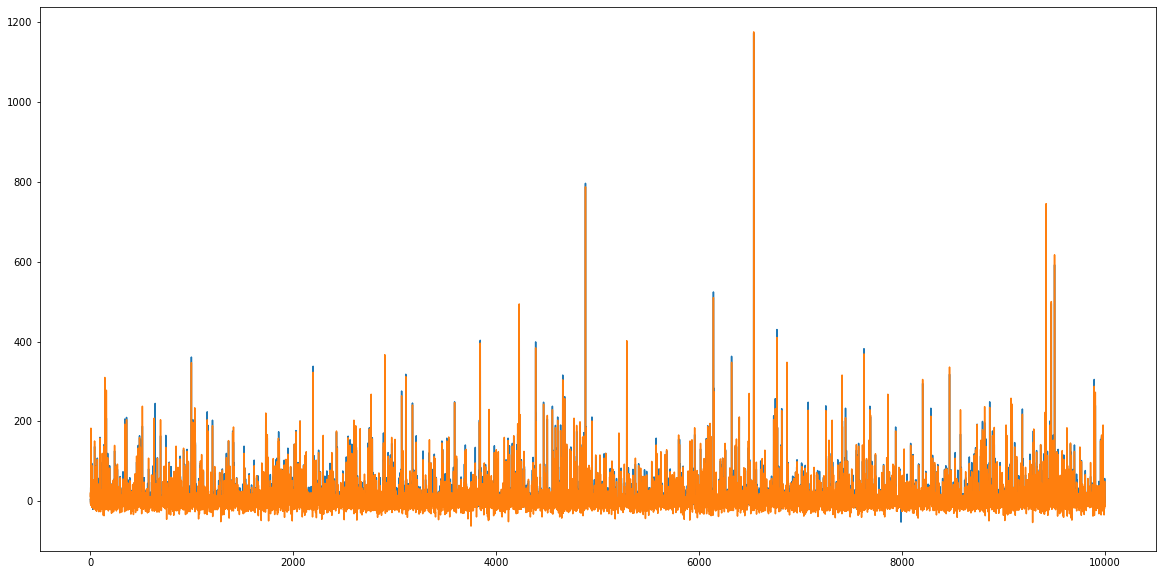

In [112]:
#2e)
#Plotted a graph to observe this pattern 
plt.figure(figsize=(20, 10))
plt.plot(df['DepDelay'][:10000])
plt.plot(df['ArrDelay'][:10000])
plt.plot()
#To observe clearly I sampled 10,000 rows of data

#Yes late departures tend to late arrivial time 

In [128]:
#2f)Which route (from origin airport to destination airport) has the most **late** arrivals?* SAI
   
#To use groupby I added one column called route with Airport IDs Origin Id - Dest ID
df['Route'] = df['OriginAirportID'].astype(str) + '-' + df['DestAirportID'].astype(str)
df.groupby('Route')['ArrDel15'].sum().sort_values(ascending=False)

# we can see airport IDs on top 

Route
12892-14771    324
14771-12892    286
12889-14771    198
12953-10397    196
10397-12953    174
              ... 
14027-13232      0
14027-11278      0
11042-14747      0
11042-14843      0
13871-12953      0
Name: ArrDel15, Length: 2483, dtype: int64

In [132]:
df[df['OriginAirportID'] == 12892].iloc[0]['OriginAirportName'] #Los Angeles International
df[df['OriginAirportID'] == 14771].iloc[0]['OriginAirportName'] # San Francisco International
#Route:Southwest FLos Angeles International to San Francisco International

'San Francisco International'

In [134]:
#2g)  Which route has the highest average arrival delay?*
df.groupby('Route')['ArrDelay'].mean().sort_values(ascending=False)



Route
14635-11292    81.000000
12478-14524    71.090909
14122-14492    63.000000
11298-13830    59.263158
13796-10721    54.111111
                 ...    
13871-12953   -22.200000
12451-13232   -22.727273
12478-14683   -23.083333
11292-13830   -25.500000
12339-10721   -26.000000
Name: ArrDelay, Length: 2483, dtype: float64

In [137]:
df[df['OriginAirportID'] == 14635].iloc[0]['OriginAirportName'] #Southwest Florida International
df[df['OriginAirportID'] == 11292].iloc[0]['OriginAirportName'] # Denver International
#Route:Southwest Florida International to Denver International


'Denver International'

In [138]:
df

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,Route
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,New York,NY,1539,4,0.0,1824,13,0,0,15304-12478
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,...,Chicago,IL,710,3,0.0,740,22,1,0,14122-13232
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,Washington,DC,810,-3,0.0,1614,-7,0,0,14747-11278
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,...,Cleveland,OH,804,35,1.0,1027,33,1,0,13930-11042
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,Atlanta,GA,545,-1,0.0,728,-9,0,0,13931-10397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,...,Los Angeles,CA,1730,1,0.0,1945,18,1,0,13204-12892
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,...,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0,10397-11697
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,...,Baltimore,MD,1540,30,1.0,1935,15,1,0,12191-10821
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,...,Honolulu,HI,609,-5,0.0,641,-6,0,0,13830-12173


ASSIGNMENT COMPLETED

In [28]:
a = df['DepDel15'].fillna(0.0)

<span style='color:red'>S  A  I </span>

In [29]:
a.unique()

array([0., 1.])

In [30]:
a.mode()

0    0.0
Name: DepDel15, dtype: float64

In [32]:
(df == '?').sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [33]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    sep=<no_default>,
    delimiter=None,
    header='infer',
    names=<no_default>,
    index_col=None,
    usecols=None,
    squeeze=None,
    prefix=<no_default>,
    mangle_dupe_cols=True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=None,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression: 'CompressionOptions' = 'infer',
    thousands=None,
    decimal: 'str' = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    esc

'Southwest Florida International'

In [58]:
df.loc[:, 'Year']

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
271935    2013
271936    2013
271937    2013
271938    2013
271939    2013
Name: Year, Length: 271940, dtype: int64

In [59]:
# [rows, cols]
df.loc[1:10, 'Year':'Carrier']

,Year,Month,DayofMonth,DayOfWeek,Carrier
1,2013,9,23,1,WN
2,2013,9,7,6,AS
3,2013,7,22,1,OO
4,2013,5,16,4,DL
5,2013,7,28,7,UA
6,2013,10,6,7,WN
7,2013,7,28,7,EV
8,2013,10,8,2,AA
9,2013,5,12,7,UA
10,2013,6,9,7,OO


In [62]:
df.iloc[0:10, 0:5]

,Year,Month,DayofMonth,DayOfWeek,Carrier
0,2013,9,16,1,DL
1,2013,9,23,1,WN
2,2013,9,7,6,AS
3,2013,7,22,1,OO
4,2013,5,16,4,DL
5,2013,7,28,7,UA
6,2013,10,6,7,WN
7,2013,7,28,7,EV
8,2013,10,8,2,AA
9,2013,5,12,7,UA


In [ ]:
df.loc[df]